<a href="https://colab.research.google.com/github/giooooia/Machine-Learning/blob/analisi_bivariata/analisi_bivariata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone -b "analisi_bivariata" https://github.com/giooooia/Machine-Learning.git
import sys
sys.path.append("/content/Machine-Learning/Data Analysis")

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 47 (delta 19), reused 32 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 262.34 KiB | 8.74 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/Machine-Learning/Data/divorce_df.csv")

# Analisi Bivariata

In [3]:
from analisi_bivariata import *

## Variabili quantitative
Iniziamo visualizzando una griglia di boxplot delle variabili numeriche rispetto al target divorced. Questa analisi è molto utile per individuare pattern visivi e differenze tra coppie divorziate e non.

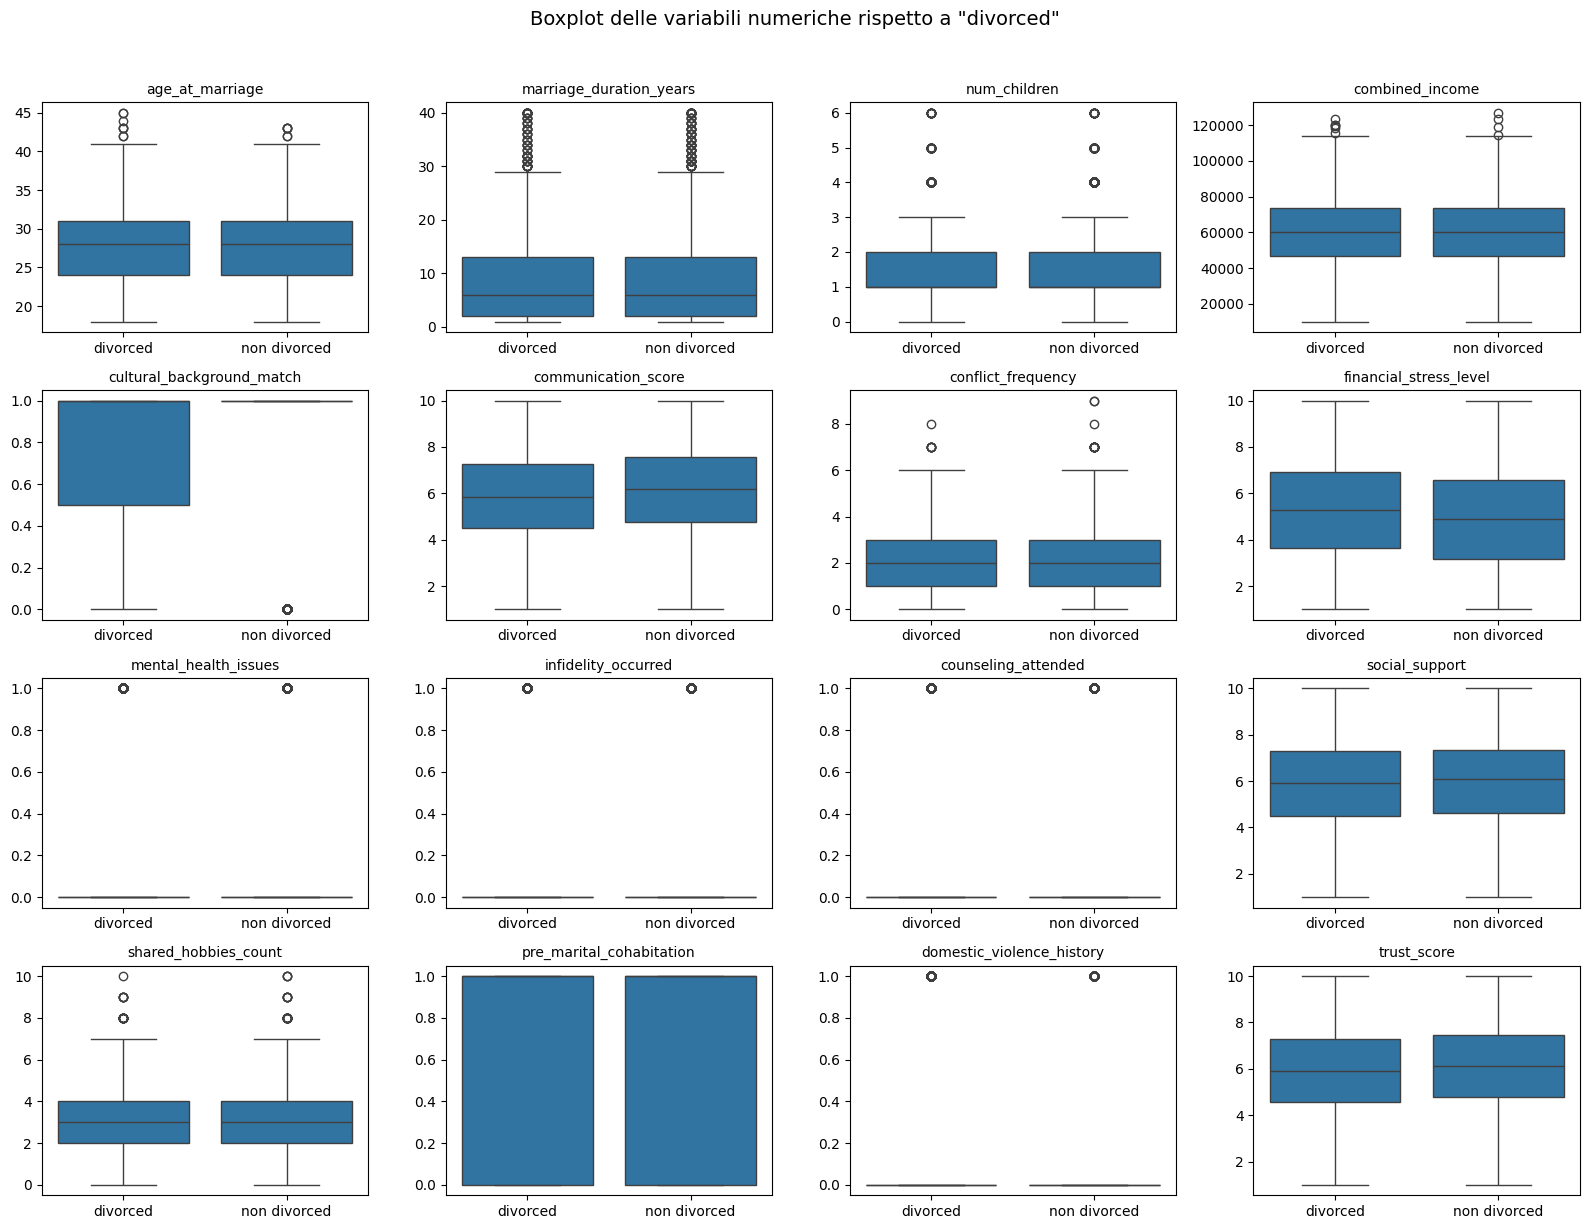

In [19]:
num_cols, cat_cols = get_column_types(df, 'divorced')
# Boxplot multipli
plot_numeric_boxplots_grid(df, num_cols, 'divorced', 4)

**Variabili anagrafiche e familiari**

- *age_at_marriage* : abbiamo una distribuzione molto simile tra divorziati e non, per cui l’età al matrimonio non sembra discriminante.

- *marriage_duration_years* : i divorziati mostrano una leggera tendenza a durate più brevi, ma la differenza non è marcata.

- *num_children* : anche qui nessuna differenza rilevante

**Aspetti economici e sociali**

- *combined_income* : le mediane sono molto vicine, ma i divorziati sembrano avere una leggera variabilità maggiore (range più ampio), perciò potrebbe esserci un legame debole con stress finanziario o instabilità economica.

- *financial_stress_level* : i divorziati mostrano una mediana più alta: chi vive più stress economico tende leggermente di più al divorzio. Questa potrebbe essere una variabile potenzialmente predittiva.

- *social_support* : nei divorziati la mediana è più bassa, segno che minore supporto sociale può essere associato a un rischio più alto di divorzio. Questo sembra coerente con la letteratura sociale.

**Aspetti relazionali e psicologici**

- *communication_score* : La mediana dei divorziati è leggermente più bassa. Questa tendenza è sensata poichè una peggior comunicazione può portare ad probabilità più alta di rottura.

- *trust_score* : anche qui i divorziati hanno un trust più basso. C'è quindi un'indicazione di legame tra fiducia e stabilità matrimoniale.

- *conflict_frequency* : i divorziati hanno conflitti più frequenti, con una distribuzione spostata verso l’alto.

**Aspetti di compatibilità e contesto**

- *cultural_background_match*: osserviamo una leggera differenza: i non divorziati sembrano avere maggiore compatibilità culturale. Questo può rappresentare quindi un potenziale fattore di protezione.

- *mental_health_issues* : in questo caso i dati sono molto sbilanciati (molti 0), ma possibile tendenza verso valori leggermente più alti nei divorziati.

- *infidelity_occurred* : la distribuzione mostra che la maggior parte dei divorziati ha avuto episodi di infedeltà (valori 1). Qua abbiamo una forte associazione visiva con il divorzio.

- *counseling_attended* : Più frequente tra i divorziati; può indicare tentativi di risolvere problemi prima della rottura.

- *pre_marital_cohabitation*: nessuna differenza evidente, pertanto la convivenza pre-matrimoniale non sembra influire molto.

- *domestic_violence_history* : più frequente nei divorziati; pochi casi, ma l’effetto è netto quando presente.

**Aspetti legati a tempo libero e connessione**
- *shared_hobbies_count* → I divorziati tendono ad avere leggermente meno hobby condivisi. Questo suggerisce che una minore interazione o minori interessi comuni portano un maggiore rischio.

In sintesi:
- Comunicazione, fiducia, conflitto	sembrano essere indicatori chiave.
- Stress economico e supporto sociale sembrano essere fattori secondari ma rilevanti
- Per quanto riguarda infedeltà, violenza, salute mentale possiamo considerarle come fattori critici ma meno frequenti
- Età, figli, convivenza, reddito	sono invece fattori neutri nel dataset

Riassumiamo quanto detto visualizzando le correlazioni tra le feature numeriche e la variabile target

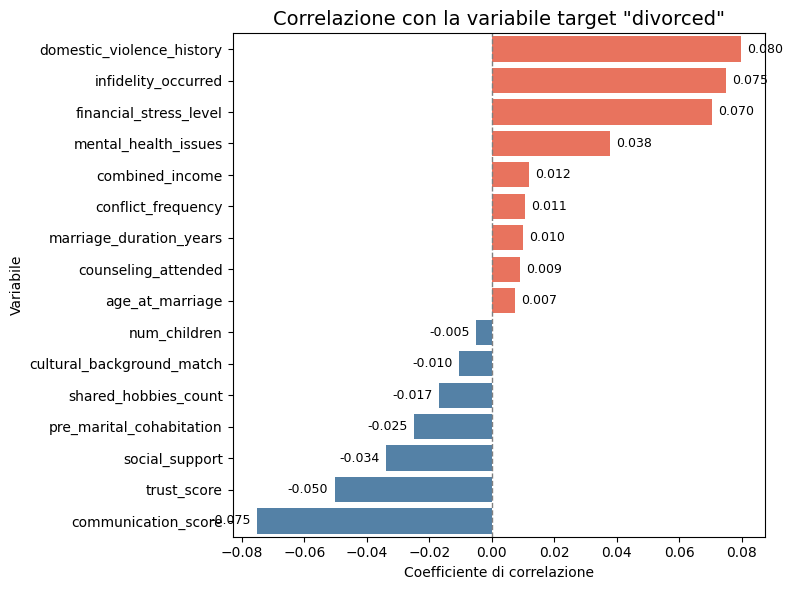

In [5]:
plot_target_correlations(df)

Osserviamo che le correlazioni, sia positive che negative, non sono molto elevate.
Quelle più significative risultano essere:
- *domestic_violence_history*	(+0.08): leggera correlazione positiva, indica che chi ha episodi di violenza domestica tende un po’ più al divorzio
- *infidelity_occurred*	(+0.07): stesso discorso: piccolo effetto, coerente ma debole
- *financial_stress_level*	(+0.07): minima tendenza: più stress economico porta leggermente a più divorzi

I valori sono in generale molto bassi, ciò significa che nessuna singola variabile spiega da sola il divorzio. Non c’è un fattore lineare dominante; la relazione è multifattoriale.

## Variabili qualitative
Visualizziamo dei bar chart per ciascuna delle variabili qualitative, per osservare come si distribuiscono rispetto al target 'divorced'

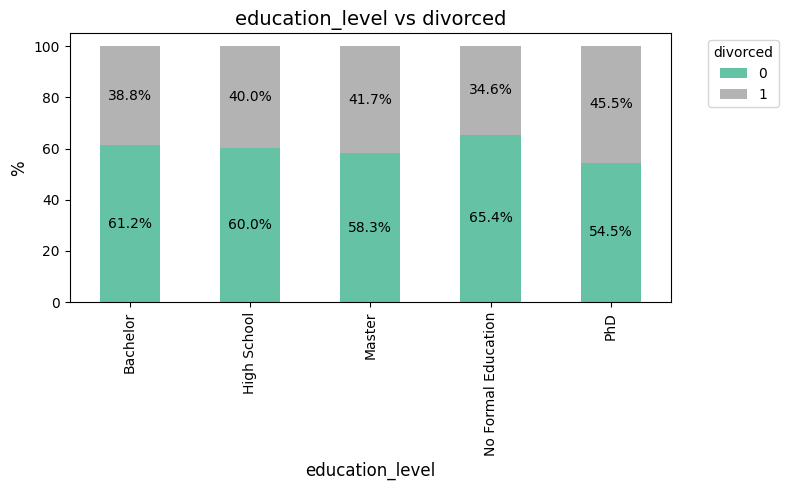

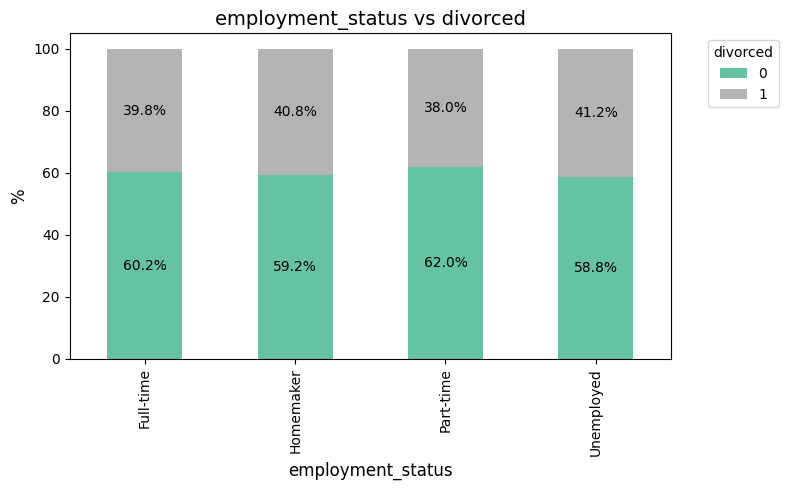

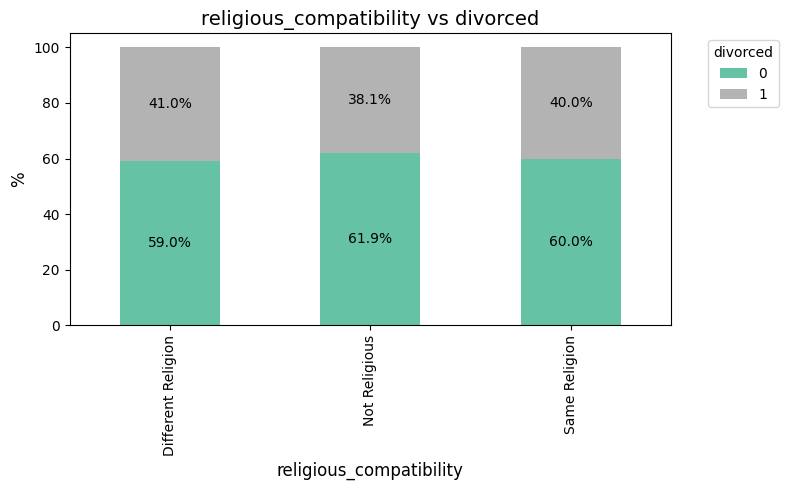

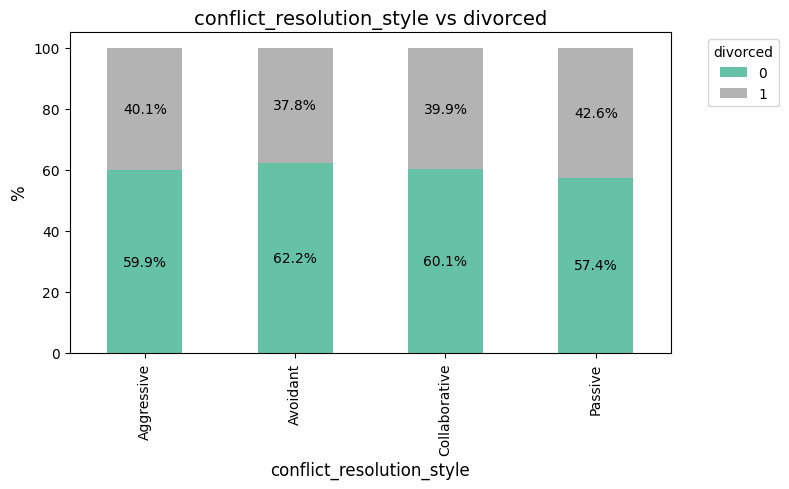

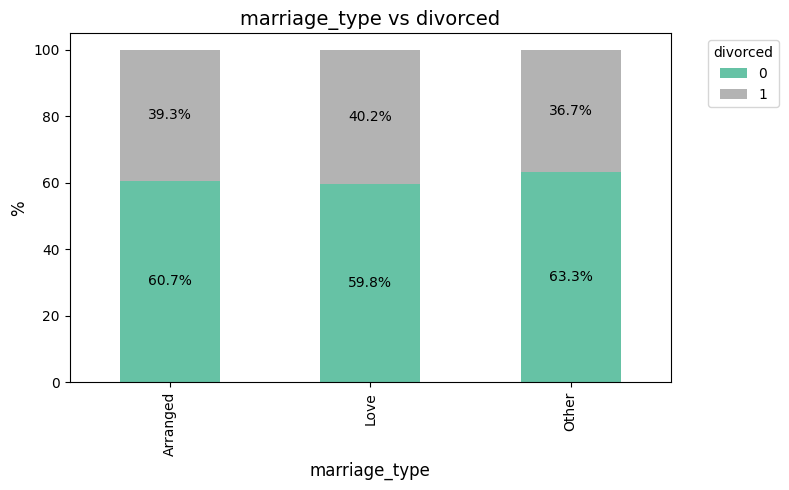

In [6]:
plot_categorical_bars(df, cat_cols)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_target_distribution_by_categories(df, cat_cols, target='divorced'):
    """
    Per ogni variabile categorica nella lista cat_cols, mostra la distribuzione dei valori
    all'interno di ciascuna classe del target come barre impilate orizzontali con percentuali.
    """
    for cat_col in cat_cols:
        # Tabella percentuale normalizzata per colonna (target)
        tab = pd.crosstab(df[cat_col], df[target], normalize='columns') * 100

        # Impostazioni grafico
        fig, ax = plt.subplots(figsize=(8, 5))

        # Barre impilate (orizzontali)
        bottom = np.zeros(tab.shape[1])
        colors = plt.get_cmap("Set2").colors  # palette di colori
        for i, cat_value in enumerate(tab.index):
            ax.bar(tab.columns, tab.loc[cat_value], bottom=bottom, label=cat_value, color=colors[i % len(colors)])

            # Annotazioni percentuali
            for j, val in enumerate(tab.loc[cat_value]):
                if val > 0:
                    ax.text(
                        j,
                        bottom[j] + val / 2,
                        f"{val:.1f}%",
                        ha='center',
                        va='center',
                        fontsize=10,
                        color='black'
                    )
            bottom += tab.loc[cat_value].values

        # Titoli e label
        ax.set_ylabel('% all’interno del target', fontsize=12)
        ax.set_xlabel(target, fontsize=12)
        ax.set_title(f'Distribuzione di "{cat_col}" per {target}', fontsize=14)

        # Legenda fuori dal grafico
        ax.legend(title=cat_col, bbox_to_anchor=(1.05, 1), loc='upper left')

        plt.tight_layout()
        plt.show()


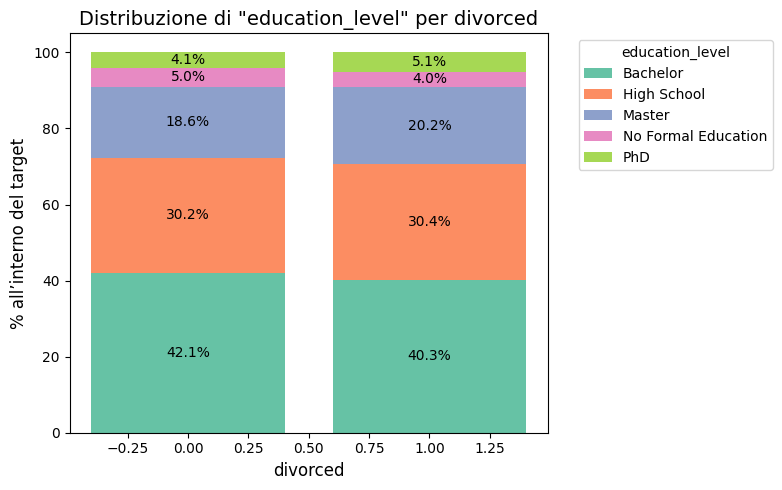

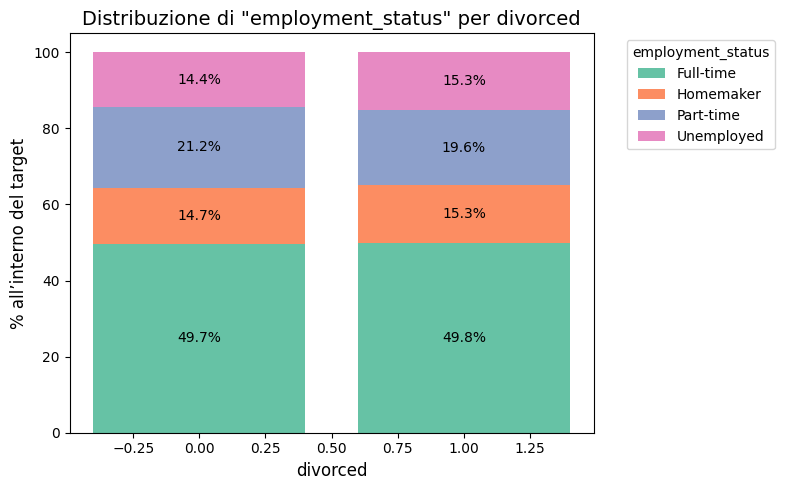

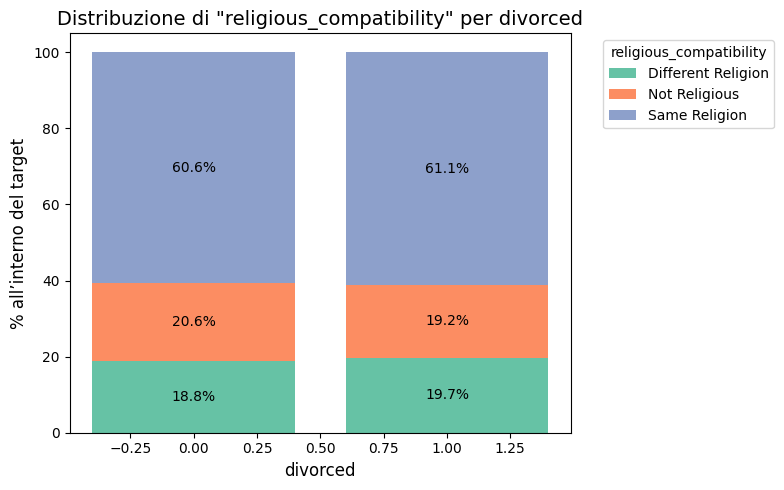

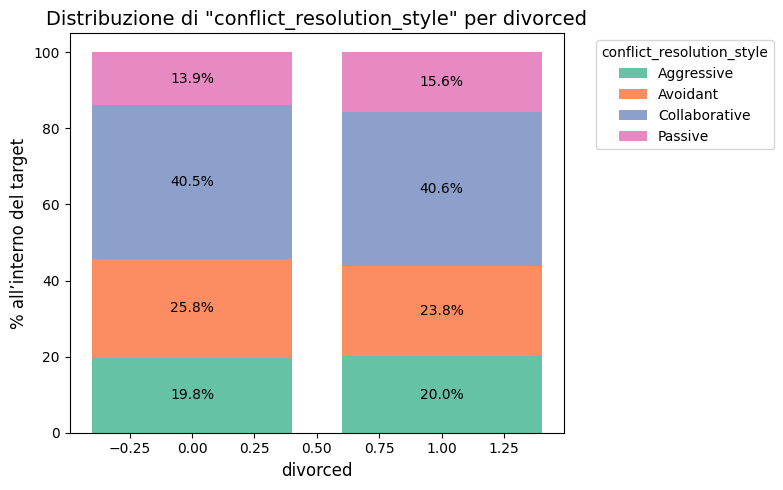

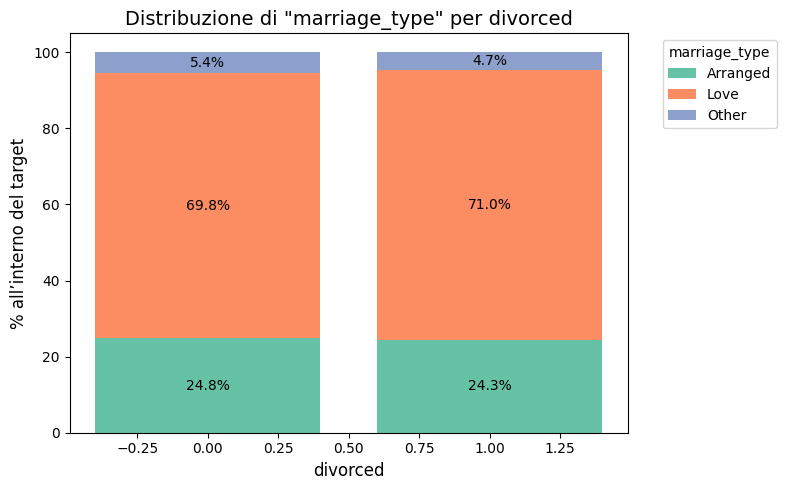

In [20]:
plot_target_distribution_by_categories(df, cat_cols, target='divorced')